# Logistic Regression Model
## Introduction
In this notebook, we'll be exploring a Logistic regression is a widely used statistical method for analyzing binary data. It is a supervised learning algorithm that is used to predict the probability of a categorical outcome (i.e. binary classification).


Logistic Regression model using the breast cancer dataset from the scikit-learn library. Logistic Regression is a popular statistical model used to analyze and model the relationships between categorical dependent variables and one or more independent variables.

## Dataset

We will be using the breast cancer dataset from scikit-learn library in Python. This dataset contains information about various characteristics of breast cancer tumors, such as their radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

## Import Libraries

Import the necessary libraries for analysis, we'll be using pandas, numpy, sklearn, and matplotlib.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data

Load the breast cancer dataset using the load_breast_cancer() function from scikit-learn. Also, Create a Pandas DataFrame to store our data.

In [2]:
# Load the breast cancer dataset
dataset =  load_breast_cancer()

# Access the feature data and target variable
# X = dataset['data']
# y = dataset['target']

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])

# Add the target variable to the DataFrame
df['target'] = dataset['target']

# Display the first few rows of the DataFrame
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness   
0        17.99         10.38          122.80     1001.0          0.11840  \
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry   
0           0.27760          0.3001              0.14710         0.2419  \
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area   
0             

## Exploratory Data Analysis (EDA)

let's take a look at the data to gain some insights and understand the relationships between variables.

In [3]:
# Summary statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [4]:
# Distribution of target variable
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [5]:
# Correlation matrix
corr = df.corr()

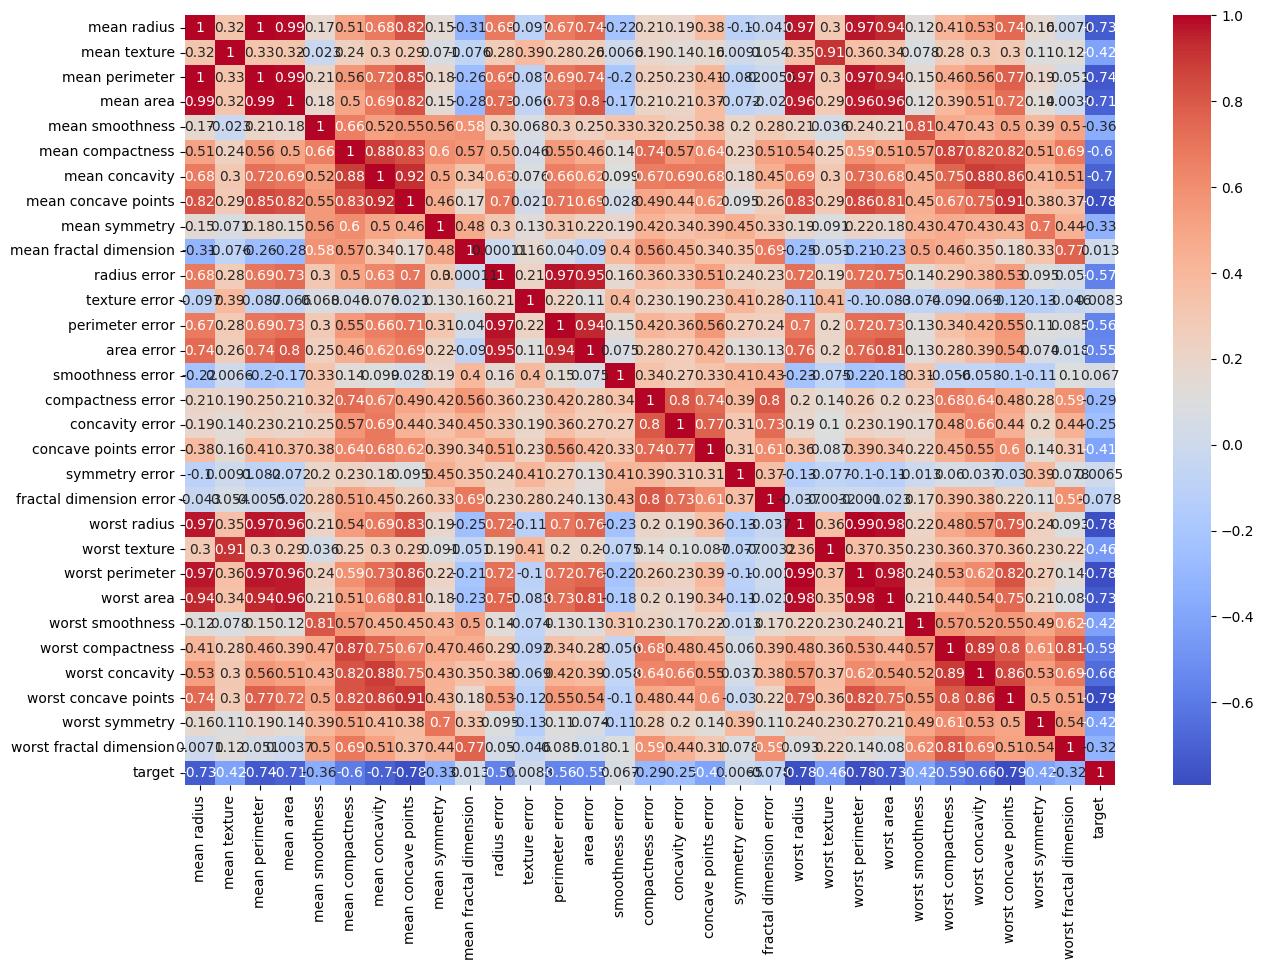

In [6]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()